# Term Statistics

In [1]:
import json
from collections import Counter
import re

# Input and output file paths
input_file = "final_index.json"
output_file = "doc_term_frequency.json"

# Load the merged JSON
with open(input_file, 'r') as infile:
    merged_data = json.load(infile)

# Function to tokenize text and clean terms
def tokenize(text):
    # Convert to lowercase, remove non-alphanumeric characters, and split by spaces
    return re.findall(r'\b\w+\b', text.lower())

# Initialize the list to store term frequency data
term_frequency_list = []

# Process each URL's content to generate term frequencies
for url, data in merged_data.items():
    # Combine all content into a single string
    full_content = data["content"]
    title = data["title"]
    
    # Tokenize the content
    content_tokens = tokenize(full_content)
    title_tokens = tokenize(title)
    
    # Count term frequencies
    term_counts = Counter(content_tokens)
    title_term_counts = Counter(title_tokens)

    
    # Add term frequency data to the list
    for term, count in term_counts.items():
        term_frequency_list.append({
            "url": url,
            "field": "content",
            "term": term,
            "count": count
        })

    for term, count in title_term_counts.items():
        term_frequency_list.append({
            "url": url,
            "field": "title",
            "term": term,
            "count": count
        })

# Save the term frequency data to a JSONL file
with open(output_file, 'w') as outfile:
    for entry in term_frequency_list:
        json.dump(entry, outfile)
        outfile.write("\n")

print(f"Doc-Term frequency data saved to {output_file}")

Doc-Term frequency data saved to doc_term_frequency.json


In [2]:
import json
rawfile = open('doc_term_frequency.json')
terms = [json.loads(line) for line in rawfile]

In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame(terms)
top10_terms = df.where(df.url == 'https://en.wikipedia.org/wiki/Alaska_Purchase').sort_values(by='count', ascending=False).head(10)

print(top10_terms)

                                                   url    field     term  \
3650058  https://en.wikipedia.org/wiki/Alaska_Purchase  content      the   
3650062  https://en.wikipedia.org/wiki/Alaska_Purchase  content       of   
3650075  https://en.wikipedia.org/wiki/Alaska_Purchase  content       to   
3650088  https://en.wikipedia.org/wiki/Alaska_Purchase  content      and   
3650073  https://en.wikipedia.org/wiki/Alaska_Purchase  content       in   
3650070  https://en.wikipedia.org/wiki/Alaska_Purchase  content        a   
3650061  https://en.wikipedia.org/wiki/Alaska_Purchase  content       wa   
3650078  https://en.wikipedia.org/wiki/Alaska_Purchase  content     that   
3650064  https://en.wikipedia.org/wiki/Alaska_Purchase  content  russian   
3650273  https://en.wikipedia.org/wiki/Alaska_Purchase  content       it   

         count  
3650058  304.0  
3650062  119.0  
3650075  113.0  
3650088   84.0  
3650073   77.0  
3650070   65.0  
3650061   52.0  
3650078   45.0  
3650064   

In [4]:
# Top 10 terms
df = pd.DataFrame(terms)
term_counts = df.groupby('term')['count'].sum().reset_index()
total_top10_terms = term_counts.sort_values(by='count', ascending=False).head(10)
print(total_top10_terms)

        term    count
105740   the  1200143
77614     of   590966
12172    and   485402
106884    to   408809
53840     in   397114
7806       a   315711
114436    wa   151781
14313     as   125082
105715  that   124618
42984    for   120503


In [5]:
# Compute the number of distinct documents in the collection.
df = pd.DataFrame(terms)
num_docs = df['url'].unique()
N = len(num_docs)
print(N)

17337


In [6]:
# Compute the number of distinct documents each term appears in and store in a dictionary.
term_doc_counts = df.groupby('term')['url'].nunique()
term_doc_count_dict = term_doc_counts.to_dict()

In [7]:
# Print the relative document frequency of 'alaska' i.e., the number of documents that contain 'alaska' divided by N.
the_relative_doc_frequency = term_doc_count_dict['alaska'] / N
print(the_relative_doc_frequency)

0.3669031551018054


In [8]:
# Compute the tf-idf value for each term in each document. Take the raw term data and add a tfidf field to each record.
df = pd.DataFrame(terms)
df = df.merge(term_doc_counts.reset_index(name='doc_freq'), on='term')
df['tfidf'] = np.log(df['count'] + 1) * np.log(N / df['doc_freq'])
print(df[['url', 'term', 'count', 'doc_freq', 'tfidf']])

                                                       url       term  count  \
0        https://en.wikipedia.org/w/index.php?action=ed...        thi      6   
1        https://en.wikipedia.org/w/index.php?action=ed...         is      4   
2        https://en.wikipedia.org/w/index.php?action=ed...         an      1   
3        https://en.wikipedia.org/w/index.php?action=ed...        old      1   
4        https://en.wikipedia.org/w/index.php?action=ed...      revis      2   
...                                                    ...        ...    ...   
4800337  https://en.wikipedia.org/w/index.php?title=Spe...       help      1   
4800338  https://en.wikipedia.org/w/index.php?title=Spe...      relat      1   
4800339  https://en.wikipedia.org/w/index.php?title=Spe...    related      1   
4800340  https://en.wikipedia.org/w/index.php?title=Spe...    changes      1   
4800341  https://en.wikipedia.org/w/index.php?title=Spe...  wikipedia      1   

         doc_freq     tfidf  
0        

In [9]:
# Print the 20 term-document pairs with the highest tf-idf values.
top20_tfidf = df.sort_values(by='tfidf', ascending=False).head(20)
print(top20_tfidf[['url', 'term', 'tfidf']])

                                                       url       term  \
1169394                 http://www.kbismarck.com/1898.html   escuadra   
1169033                 http://www.kbismarck.com/1898.html       buqu   
1168591                 http://www.kbismarck.com/1898.html      había   
1168882                 http://www.kbismarck.com/1898.html    enemigo   
1114065           http://nrchambers.tripod.com/diary.shtml      barak   
1169443                 http://www.kbismarck.com/1898.html       nudo   
3951017  http://explorenorth.com/library/history/sheles...      dryad   
1168869                 http://www.kbismarck.com/1898.html  situación   
1169446                 http://www.kbismarck.com/1898.html        mm8   
1169294                 http://www.kbismarck.com/1898.html      porqu   
1168754                 http://www.kbismarck.com/1898.html     fueron   
1168847                 http://www.kbismarck.com/1898.html     posibl   
1168993                 http://www.kbismarck.com/18

In [10]:
# Compute a list of the distinct words in this collection and sort it in descending order of frequency.
frequency = []
df = pd.DataFrame(terms)
term_frequencies = df.groupby('term')['count'].sum().reset_index()
term_frequencies = term_frequencies.sort_values(by='count', ascending=False)
frequency = list(term_frequencies.itertuples(index=False, name=None))
print(len(frequency))
print(frequency[0])

147802
('the', 1200143)


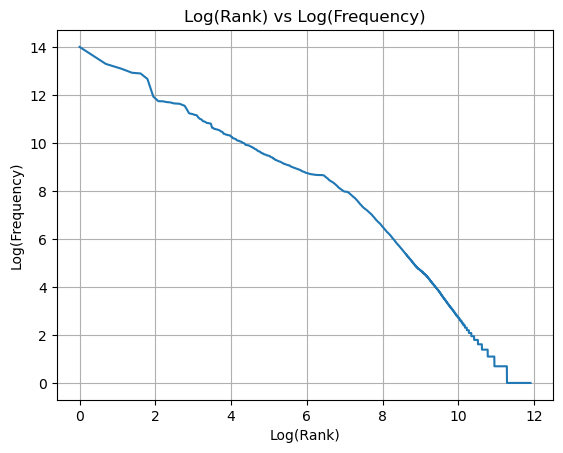

In [11]:
# Plot a graph of the log of the rank (starting at 1) on the x-axis, against the log of the frequency on the y-axis.
import matplotlib.pyplot as plt

ranks = range(1, len (frequency) + 1)
frequencies = term_frequencies['count'].tolist()

log_ranks = np.log(ranks)
log_freqs = np.log(frequencies)

# Plot the graph
plt.plot(log_ranks, log_freqs)
plt.xlabel('Log(Rank)') 
plt.ylabel('Log(Frequency)') 
plt.title('Log(Rank) vs Log(Frequency)')
plt.grid(True)
plt.show()

In [12]:
# TODO: Compute the number of tokens in the corpus. Remember to count each occurrence of each word.
df = pd.DataFrame(terms)
ntokens = df['count'].sum()
print(ntokens)

18387836


In [13]:
# Compute the proportion of tokens made up by the top 10 most frequent words.
df = pd.DataFrame(terms)
top_10 = df.groupby('term')['count'].sum().sort_values(ascending=False).head(10)
top10_tokens = top_10.sum()
proportion_top_10 = top10_tokens / ntokens
print(proportion_top_10)

0.2131914272022004


In [14]:
# Compute the proportion of tokens made up by the words that occur exactly once in this collection.
df = pd.DataFrame(terms)
term_frequencies = df.groupby('term')['count'].sum().reset_index()
single_occurrence_tokens = term_frequencies[term_frequencies['count'] == 1]['count'].sum()
proportion_single_occurrence = single_occurrence_tokens / ntokens
print(proportion_single_occurrence)

0.0037289325399682705
